In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Q1

In [19]:
data = pd.read_csv("C:/tobigs/bacteria.csv")

In [20]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


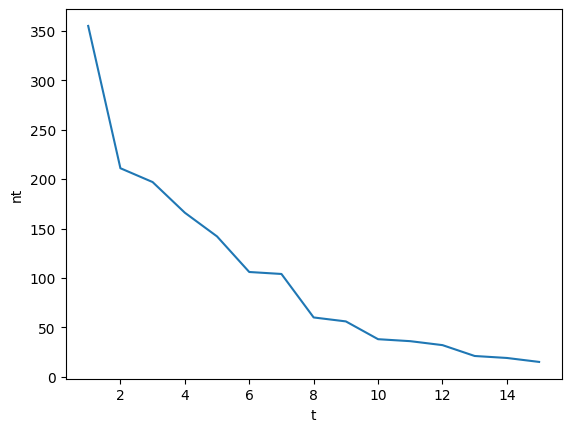

In [21]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [22]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

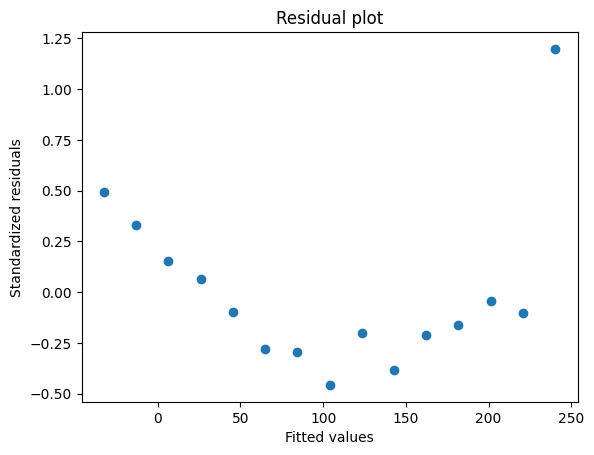

In [23]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

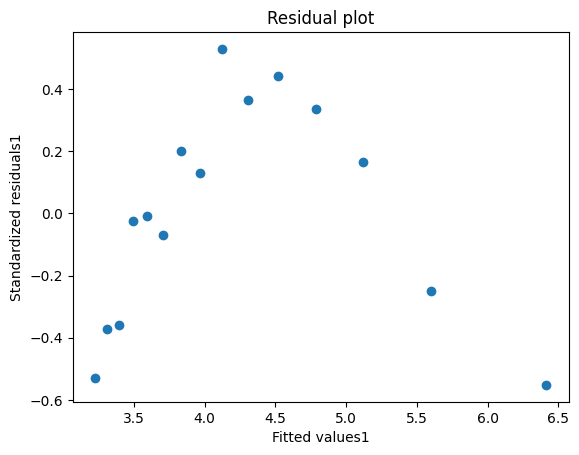

In [28]:
# ans :
# 로그 변환 한 후 일반 선형회귀 하는 것이 답이라고 생각 했는데, 그럼에도 여전히 등분산성을 관측할 수 없습니다ㅠㅠ 

data['log_t']=np.log(data['t'])
data['log_nt']=np.log(data['nt'])


model = LinearRegression()
model.fit(data[['log_t']], data['log_nt'])

# 예측값과 표준화 잔차 계산
fitted_values1 = model.predict(data[['log_t']])
standardized_residuals1 = (data['log_nt'] - fitted_values1) / data['log_nt'].std()

# residual plot
plt.scatter(fitted_values1, standardized_residuals1)
plt.xlabel('Fitted values1')
plt.ylabel('Standardized residuals1')
plt.title('Residual plot')
plt.show()

### Q2

In [9]:
# 데이터 로드
data2 = pd.read_csv("C:/tobigs/artificial1.csv")

In [10]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [11]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [12]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        21:41:25   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

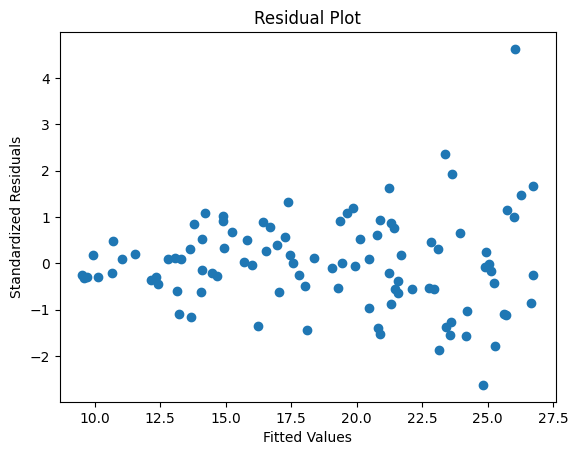

In [13]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.91
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.07e-07
Time:                        23:00:43   Log-Likelihood:                -64.901
No. Observations:                 100   AIC:                             133.8
Df Residuals:                      98   BIC:                             139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6954      0.199      8.528      0.0

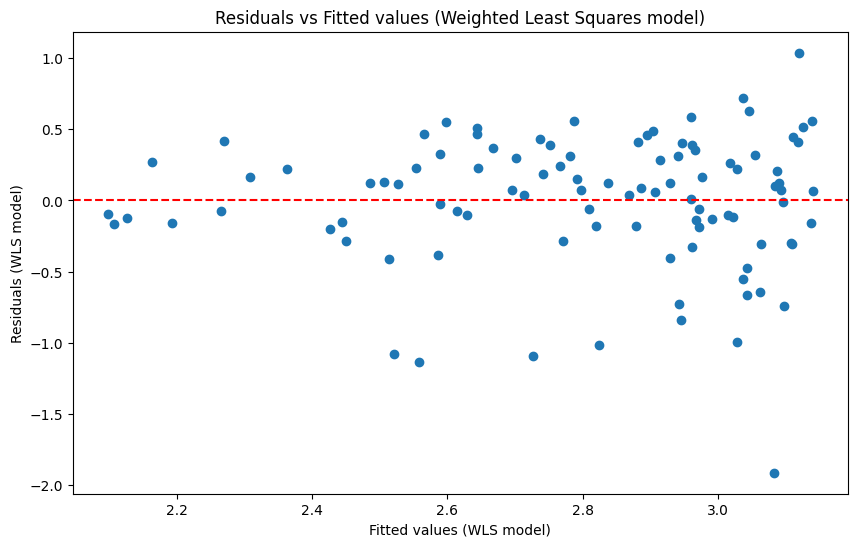

In [37]:
# ans :

data2['log_X']=np.log(data2['X'])
data2['log_Y']=np.log(data2['Y'])

# 독립 변수(X)와 종속 변수(Y) 정의
X = data2['log_X']
Y = data2['log_Y']

# 상수항 추가
X = sm.add_constant(X)

# 일반 최소 제곱 (OLS) 회귀 분석
model = sm.OLS(Y, X).fit()
print(model.summary())

# 잔차 계산
residuals = model.resid

# 잔차의 분산에 반비례하는 가중치 계산
weights = 1 / (residuals**2)

# 가중회귀분석 (WLS) 모델 피팅
model_wls = sm.WLS(Y, X, weights=weights).fit()
print(model_wls.summary())

# 가중회귀분석 모델의 잔차 분석
fitted_values_wls = model_wls.fittedvalues
residuals_wls = model_wls.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_wls, residuals_wls)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (WLS model)')
plt.ylabel('Residuals (WLS model)')
plt.title('Residuals vs Fitted values (Weighted Least Squares model)')
plt.show()


### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans :

In [ ]:
등분산성은 독립변수의 값에 대해 종속변수의 분산이 일정하다는 것을 의미한다. 따라서 회귀모델이 다양한 X값에 대해 일관된 예측 정확도를 유지할 수 있다.
그러나 이가 지켜지지 않는다면, 역으로 회귀모델이 다양한 X값에 대해 일관된 예측 정확도를 유지할 수 없게 되기 때문에, 등분산성의 위배가 문제가 된다.